python | keras | scikit-learn
--- | --- | ---
![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png) | ![Keras Logo](https://devblogs.nvidia.com/parallelforall/wp-content/uploads/2017/08/Keras_Logo_358x230-179x115.png) | ![scikit_learn_logo](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

# Getting Started with Deep Learning using Keras and Python
### Mike Williams

### my notes, Arturo Alatriste Trujillo


## Table of Content

* [install_packages](#install_packages)
* [load_packages](#load_packages)



<a id = 'install_packages'> </a>

### install packages

In [ ]:
'''
# in a Conda terminal install the libraries

conda install -c anaconda seaborn 
conda install -c conda-forge tensorflow 
conda install -c conda-forge keras 

'''

<a id = 'load_packages'> </a>

### load_packages

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np
import pandas            as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model     import LogisticRegressionCV

from keras.datasets           import mnist
from keras.models             import Sequential
from keras.layers.core        import Dense, Dropout, Activation
from keras.utils              import np_utils



<a id = 'scikit_learn'> </a>

In [50]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array( train_y )
test_y_ohe  = one_hot_encode_object_array( test_y  )

<a id = 'build_nn'> </a>

## MNIST Handwritten Digits

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn           as sns
import numpy             as np
import pandas            as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model     import LogisticRegressionCV

from keras.datasets           import mnist
from keras.models             import Sequential
from keras.layers.core        import Dense, Dropout, Activation
from keras.utils              import np_utils

C:\aat\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from keras.datasets import mnist

nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data( 'C:/aat/data/mnist_handwritten_digits' )
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)


 

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


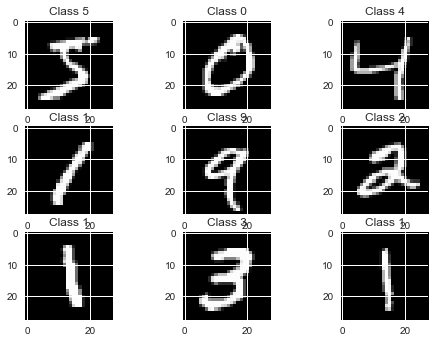

In [5]:
# Let's look at some examples of the training data

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [20]:
# format data from training

X_train  = X_train.reshape(60000, 784)
X_test   = X_test.reshape(10000, 784)
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
X_train /= 255
X_test  /= 255
print( "Training matrix shape", X_train.shape )
print( "Testing matrix shape",  X_test.shape  )

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [21]:
# Modify the target matrices to be in the one-hot format,

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [22]:
#AAT
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

Y_train_ohe = one_hot_encode_object_array( Y_train )
Y_test_ohe  = one_hot_encode_object_array( Y_test  )

In [23]:
# Build the Neural Network

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [24]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [25]:
# train the model
model.fit(X_train, Y_train,
          batch_size      = 128, 
          epochs          =   4,
          #show_accuracy   = True, 
          verbose         =   1,
          validation_data = (X_test, Y_test))    

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 15s - loss: 0.8029 - val_loss: 0.3584
Epoch 2/4
60000/60000 [==============================] - 15s - loss: 0.3463 - val_loss: 0.2805
Epoch 3/4
60000/60000 [==============================] - 15s - loss: 0.2743 - val_loss: 0.2320
Epoch 4/4
60000/60000 [==============================] - 16s - loss: 0.2239 - val_loss: 0.1837


### Finally, evaluate its performance

In [34]:
#loss, accuracy = model.evaluate( X_test, Y_test_ohe, verbose=0 )
#print( "Accuracy = {:.2f}".format(accuracy) )

#score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test error: ', score )
print('Test accuracy:', 1 - score )

Test error:  0.183724430449
Test accuracy: 0.816275569551


### Inspecting the output

In [32]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9920/10000 [============================>.] - ETA: 0s

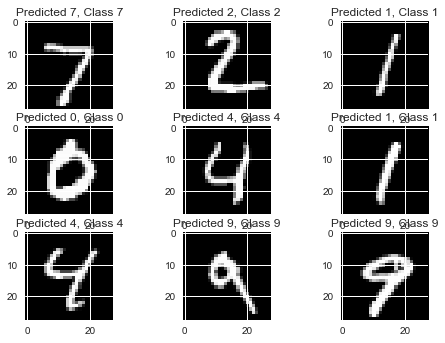

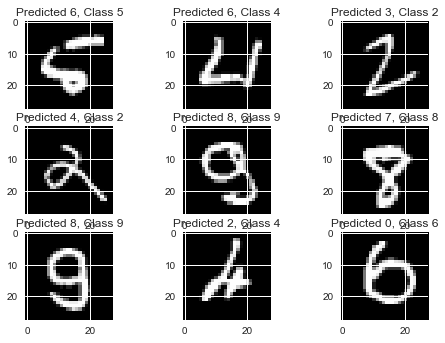

In [33]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

### refernces

mnist keras notebook
* https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb

MNIST database of handwritten digits
* http://keras.io/datasets/